In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
# ●	Load the dataset into a DataFrame or equivalent data structure.
df=pd.read_csv('Cardiotocographic.csv')

In [88]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [90]:
# ●	Handle missing values appropriately (e.g., imputation, deletion).
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


LB          21
AC          20
DS          21
DP          21
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [91]:
mean = df.mean()
mean

LB          133.343598
AC            0.003219
FM            0.009894
UC            0.004391
DL            0.001895
DS            0.000003
DP            0.000175
ASTV         46.995984
MSTV          1.364378
ALTV         10.285964
MLTV          8.284887
Width        70.429260
Tendency      0.316371
NSP           1.304507
dtype: float64

In [92]:
df.fillna(df.mean(),inplace=True)

In [93]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [94]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [95]:
df['LB'] =df['LB'].astype(float)
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


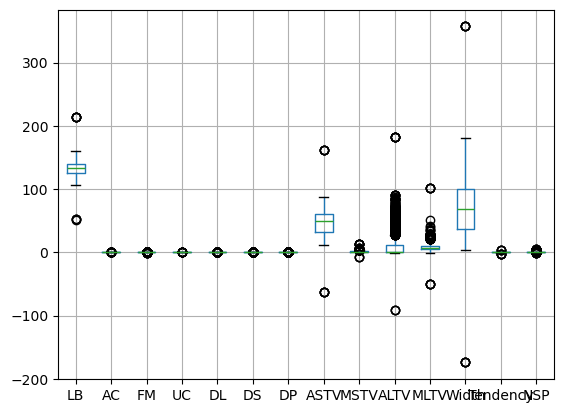

In [96]:
df.boxplot()
plt.show()

In [97]:
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

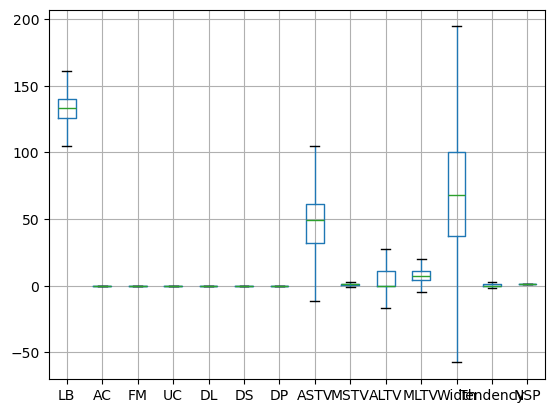

In [98]:
df.boxplot()
plt.show()

In [99]:
summary = df.describe()
summary

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0
mean,133.293725,0.003147,0.001568,0.004362,0.001770,0.0,0.0,46.981873,1.304644,6.691678,8.016212,70.321076,0.319662,1.0
std,9.930227,0.003826,0.002485,0.003001,0.002668,0.0,0.0,17.612745,0.781091,10.378400,5.046784,39.570633,0.621602,0.0
min,105.000000,-0.008409,-0.003850,-0.005177,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.0
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,161.000000,0.014015,0.006416,0.013564,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000,1.0


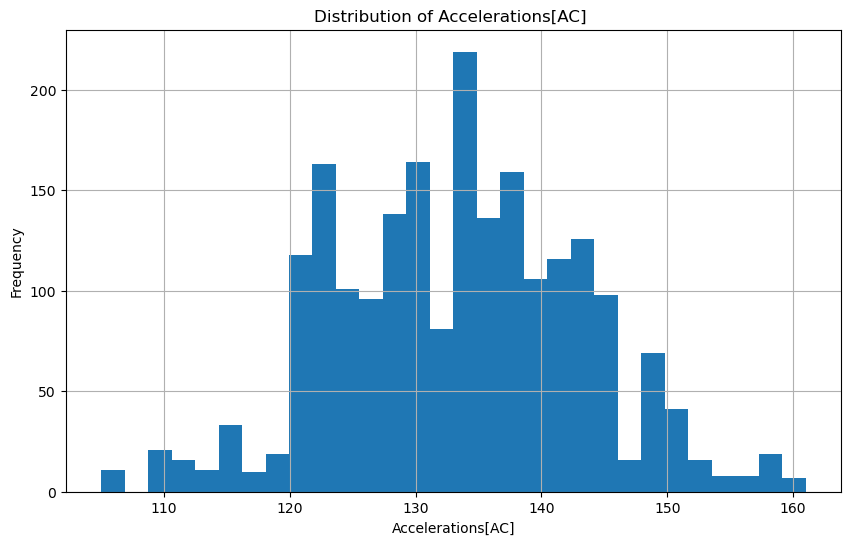

In [100]:
plt.figure(figsize=(10,6))
df['LB'].hist(bins=30)
plt.title('Distribution of Accelerations[AC] ')
plt.xlabel("Accelerations[AC]")
plt.ylabel('Frequency')
plt.show()

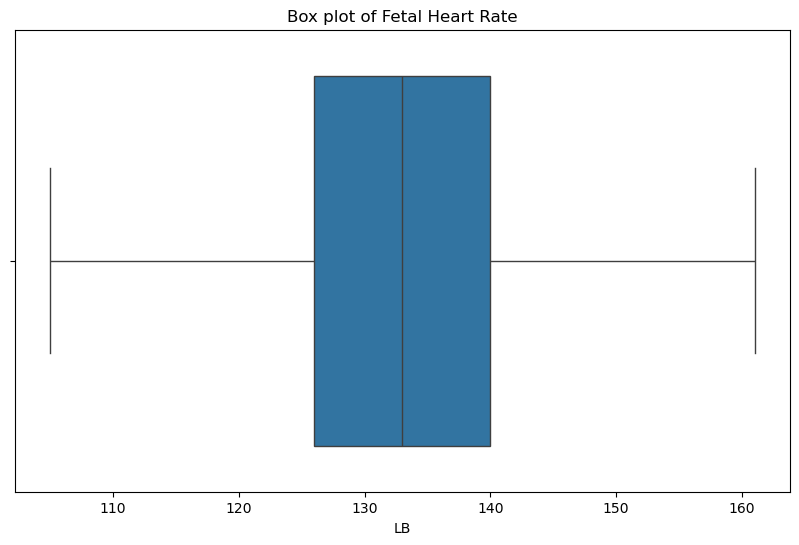

In [101]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['LB'])
plt.title('Box plot of Fetal Heart Rate')
plt.show()

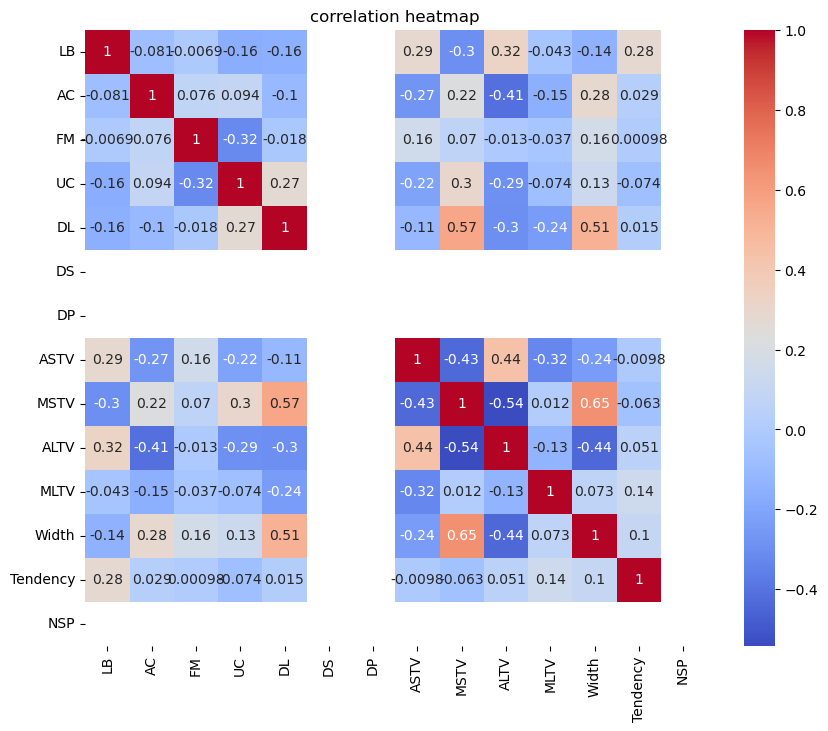

In [102]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('correlation heatmap')
plt.show()

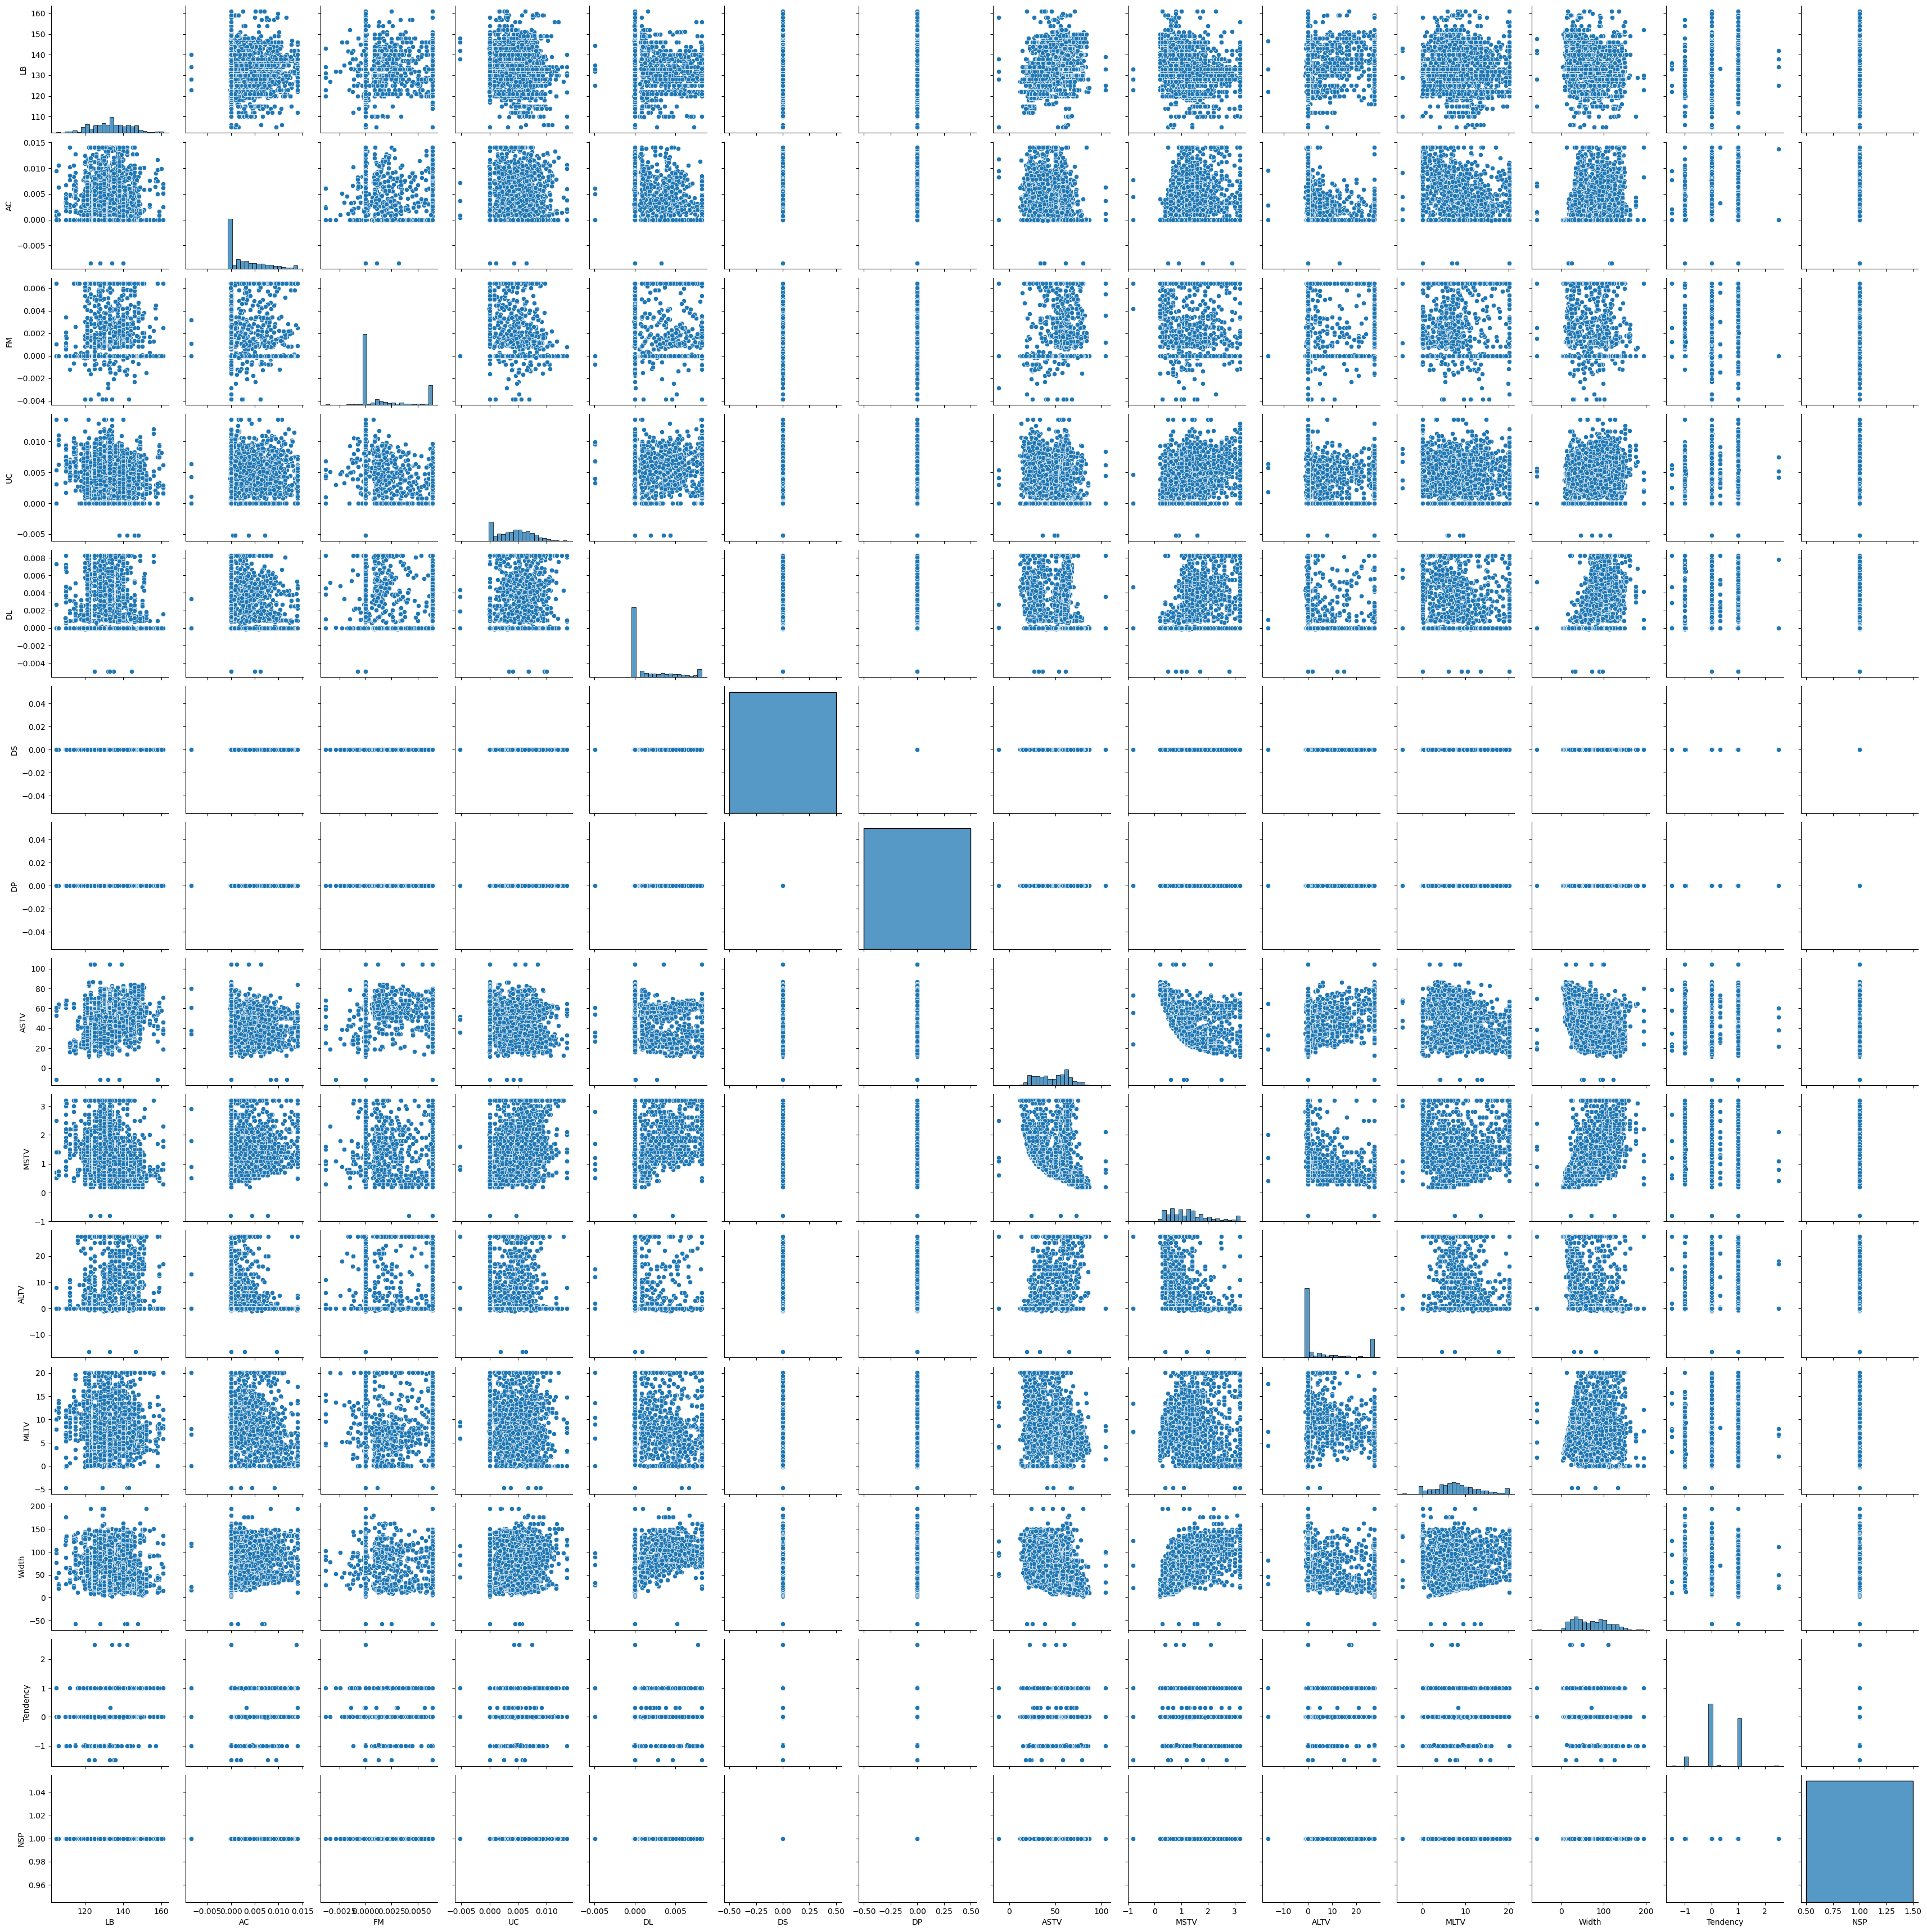

In [103]:
sns.pairplot(df)
plt.show()

In [104]:
correlation_matrix = df.corr()
print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000 -0.080880 -0.006904 -0.162773 -0.156224 NaN NaN  0.285623   
AC       -0.080880  1.000000  0.076151  0.093970 -0.102722 NaN NaN -0.272436   
FM       -0.006904  0.076151  1.000000 -0.317265 -0.017610 NaN NaN  0.156351   
UC       -0.162773  0.093970 -0.317265  1.000000  0.268605 NaN NaN -0.215984   
DL       -0.156224 -0.102722 -0.017610  0.268605  1.000000 NaN NaN -0.111624   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.285623 -0.272436  0.156351 -0.215984 -0.111624 NaN NaN  1.000000   
MSTV     -0.295485  0.217447  0.070300  0.297843  0.566340 NaN NaN -0.433844   
ALTV      0.322315 -0.409592 -0.013420 -0.293340 -0.295886 NaN NaN  0.439040   
MLTV     -0.042613 -0.152335 -0.036875 -0.074002 -0.242556 NaN NaN -0.324728   
Width    -0.140044  

In [105]:
print(correlation_matrix[correlation_matrix.abs()>0.5])

           LB   AC   FM   UC        DL  DS  DP  ASTV      MSTV      ALTV  \
LB        1.0  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
AC        NaN  1.0  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
FM        NaN  NaN  1.0  NaN       NaN NaN NaN   NaN       NaN       NaN   
UC        NaN  NaN  NaN  1.0       NaN NaN NaN   NaN       NaN       NaN   
DL        NaN  NaN  NaN  NaN  1.000000 NaN NaN   NaN  0.566340       NaN   
DS        NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
DP        NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
ASTV      NaN  NaN  NaN  NaN       NaN NaN NaN   1.0       NaN       NaN   
MSTV      NaN  NaN  NaN  NaN  0.566340 NaN NaN   NaN  1.000000 -0.541156   
ALTV      NaN  NaN  NaN  NaN       NaN NaN NaN   NaN -0.541156  1.000000   
MLTV      NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
Width     NaN  NaN  NaN  NaN  0.514648 NaN NaN   NaN  0.646056       NaN   
Tendency  Na

 Cardiotocographic Data Analysis Report

Introduction

This report summarizes the findings from an exploratory analysis of the Cardiotocographic dataset. The dataset contains various fetal heart rate (FHR) and uterine contraction measures during pregnancy, potentially indicating fetal well-being.


Key Findings

1. Data Cleaning:
     Missing values were handled by imputation using the mean. Outliers were identified and removed using the IQR method, improving the data's quality for analysis.
2. Statistical Summary:
     The statistical summary, including measures of central tendency and dispersion, provided key insights into the distribution and characteristics of each variable.
3. Data Visualization:
     Histograms were generated for several numerical variables, revealing their distribution and potential skewness. Box plots helped identify outliers.
     Correlation analysis using a heatmap revealed interesting relationships between variables, particularly between FHR measures like 'LB', 'ASTV', 'MSTV', and others related to decelerations ('DL', 'DS', 'DP').
     Pair plots helped visualize the interaction between multiple pairs of variables, showing potential correlations and clusters.

Insights and Patterns

1. There are potential correlations between the fetal heart rate (LB, ASTV, MLTV) and decelerations (DL, DS, DP). This might imply that when FHR variability is low, there's a higher probability of decelerations which can be a concern for fetal well-being.
2. Correlation can be identified by looking at the correlation heatmap which visualises the correlation values between different variables.
3. It is important to examine the correlation between FHR and uterine contractions (UC) as it can highlight potential risks.
